# Synopsis

The Center for World University Rankings (CWUR) publishes global university rankings that measure the quality of education and training of students as well as the prestige of the faculty members and the quality of their research without relying on surveys and university data submissions. 

##### Data Visualization Task :


To perform complete data visualization using Python on CWUR data to get insights on world universities using a combination of matplotlib, seaborn and plotly packages. 

### About Data

The university world ranking dataset has 14 attributes columns and 2200 rows. 

### Data Dictionary

* world_rank - world rank for university. 
* Institution - name of university 
* Country - country of each university 
* national_rank - rank of university within its country 
* quality_of_education - rank for quality of education 
* alumni_employment - rank for alumni employment 
* quality_of_faculty - rank for quality of faculty 
* publications - rank for publications 
* influence - rank for influence 
* citations - number of students at the university 
* broad_impact - rank for broad impact (only available for 2014 and 2015) 
* patents - rank for patents 
* score - total score, used for determining world rank 
* year - year of ranking (2012 to 2015) 

### Insights : Summary

The world ranking dataset has 14 columns and 2200 rows. The column includes factors that determine the world rank of a particular university in the years 2012, 2013, 2014, 2015.
From my analysis, here are the few facts that I have noticed.
Considering all the years, Harvard University bagged the first rank. Second and third were bagged by MIT and Stanford University.
From the correlation map, factors that directly affects world rank of a particular university are publications, rank of influence, citations and broad impact
From the line chart, there was some unique relationship noticed between citation and quality of education and how they are affecting the world rank.
Again from the next line chart, not much relationship was observed between citation and quality of faculty.
The publucation rates for the top 7 universities for all the years was viewed using Pie Chart.
And the scatter plot shows the relation between world rank and citation for various different years. 
From the world cloud, USA and UK were the most occuring countries in the year 2012 and 2013.
And China, USA and Japan were the most occuring during 2014 and 2015

### Lets deep dive...

### Importing required packages 

In [3]:
# Disabling the warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading base packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling as pf

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Administrator\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Administrator\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in sta

In [5]:
# Loading more advanced plotting tools

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot

In [6]:
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

In [7]:
# Importing wordcloud

import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Importing the dataset

In [8]:
# Loading the data

world_ranking = pd.read_csv("D:/Data Visualization/cwurData.csv")

### Look into the data

Inspecting the head and tail of data

In [9]:
world_ranking.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  
0             1          1          1           NaN        5  100.00  2012  
1            12          4          4           NaN        1   91.67  2012  
2             4          2          2           NaN       15   89.50  2012  
3            16         16         11           NaN       50   86.17  2012  
4            37         22         22           NaN       18   85.21  2012

In [10]:
world_ranking.tail()

world_rank                      institution   country  national_rank  \
2195         996        University of the Algarve  Portugal              7   
2196         997            Alexandria University     Egypt              4   
2197         998      Federal University of Ceará    Brazil             18   
2198         999           University of A Coruña     Spain             40   
2199        1000  China Pharmaceutical University     China             83   

      quality_of_education  alumni_employment  quality_of_faculty  \
2195                   367                567                 218   
2196                   236                566                 218   
2197                   367                549                 218   
2198                   367                567                 218   
2199                   367                567                 218   

      publications  influence  citations  broad_impact  patents  score  year  
2195           926        845        812         969.0      816  44.03  2015  
2196           997        908        645         981.0      871  44.03  2015  
2197           830        823        812         975.0      824  44.03  2015  
2198           886        974        812         975.0      651  44.02  2015  
2199           861        991        812         981.0      547  44.02  2015

Displaying a summary statistics of all observed features and labels.

In [11]:
world_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
world_rank              2200 non-null int64
institution             2200 non-null object
country                 2200 non-null object
national_rank           2200 non-null int64
quality_of_education    2200 non-null int64
alumni_employment       2200 non-null int64
quality_of_faculty      2200 non-null int64
publications            2200 non-null int64
influence               2200 non-null int64
citations               2200 non-null int64
broad_impact            2000 non-null float64
patents                 2200 non-null int64
score                   2200 non-null float64
year                    2200 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 240.7+ KB


This dataset has 14 columns and 2200 rows

Checking the basic summary statistics

In [12]:
world_ranking.describe()

world_rank  national_rank  quality_of_education  alumni_employment  \
count  2200.000000    2200.000000           2200.000000        2200.000000   
mean    459.590909      40.278182            275.100455         357.116818   
std     304.320363      51.740870            121.935100         186.779252   
min       1.000000       1.000000              1.000000           1.000000   
25%     175.750000       6.000000            175.750000         175.750000   
50%     450.500000      21.000000            355.000000         450.500000   
75%     725.250000      49.000000            367.000000         478.000000   
max    1000.000000     229.000000            367.000000         567.000000   

       quality_of_faculty  publications    influence    citations  \
count         2200.000000   2200.000000  2200.000000  2200.000000   
mean           178.888182    459.908636   459.797727   413.417273   
std             64.050885    303.760352   303.331822   264.366549   
min              1.000000      1.000000     1.000000     1.000000   
25%            175.750000    175.750000   175.750000   161.000000   
50%            210.000000    450.500000   450.500000   406.000000   
75%            218.000000    725.000000   725.250000   645.000000   
max            218.000000   1000.000000   991.000000   812.000000   

       broad_impact      patents        score         year  
count   2000.000000  2200.000000  2200.000000  2200.000000  
mean     496.699500   433.346364    47.798395  2014.318182  
std      286.919755   273.996525     7.760806     0.762130  
min        1.000000     1.000000    43.360000  2012.000000  
25%      250.500000   170.750000    44.460000  2014.000000  
50%      496.000000   426.000000    45.100000  2014.000000  
75%      741.000000   714.250000    47.545000  2015.000000  
max     1000.000000   871.000000   100.000000  2015.000000

For a more detailed summary statistics, running the Pandas Profiling

In [13]:
pf.ProfileReport(world_ranking)

From the pandas profile report, its clear that there are no missing values in the dataset and the data is pretty clean. We can further move to Exploratory Data Analysis and Visualization.

### Exploratory Data Analysis and Data Visualization

One of the preliminary steps in any Data Science Prjoect is Data Understanding. Lets explore our data and try to find interesting insights by visualizing them. 

In [14]:
world_ranking.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

### Correlation

Let us first look into the correlation between different variables in the dataset

In [15]:
corr_matrix = world_ranking.corr()
corr_matrix

world_rank  national_rank  quality_of_education  \
world_rank              1.000000       0.238553              0.676166   
national_rank           0.238553       1.000000              0.211975   
quality_of_education    0.676166       0.211975              1.000000   
alumni_employment       0.668529       0.135342              0.606421   
quality_of_faculty      0.663864       0.222833              0.786181   
publications            0.923037       0.326857              0.624657   
influence               0.895871       0.161086              0.645641   
citations               0.856573       0.186797              0.630455   
broad_impact            0.942998       0.173043              0.521615   
patents                 0.698214       0.159440              0.528120   
score                  -0.549098      -0.199756             -0.600541   
year                    0.320844       0.102951              0.427732   

                      alumni_employment  quality_of_faculty  publications  \
world_rank                     0.668529            0.663864      0.923037   
national_rank                  0.135342            0.222833      0.326857   
quality_of_education           0.606421            0.786181      0.624657   
alumni_employment              1.000000            0.558618      0.572096   
quality_of_faculty             0.558618            1.000000      0.634423   
publications                   0.572096            0.634423      1.000000   
influence                      0.527382            0.656406      0.874952   
citations                      0.559200            0.652186      0.829912   
broad_impact                   0.423619            0.549345      0.917878   
patents                        0.528219            0.555107      0.671558   
score                         -0.510374           -0.693540     -0.522111   
year                           0.427710            0.484788      0.318245   

                      influence  citations  broad_impact   patents     score  \
world_rank             0.895871   0.856573      0.942998  0.698214 -0.549098   
national_rank          0.161086   0.186797      0.173043  0.159440 -0.199756   
quality_of_education   0.645641   0.630455      0.521615  0.528120 -0.600541   
alumni_employment      0.527382   0.559200      0.423619  0.528219 -0.510374   
quality_of_faculty     0.656406   0.652186      0.549345  0.555107 -0.693540   
publications           0.874952   0.829912      0.917878  0.671558 -0.522111   
influence              1.000000   0.845207      0.916040  0.611811 -0.522837   
citations              0.845207   1.000000      0.852638  0.598728 -0.522438   
broad_impact           0.916040   0.852638      1.000000  0.562861 -0.531590   
patents                0.611811   0.598728      0.562861  1.000000 -0.474810   
score                 -0.522837  -0.522438     -0.531590 -0.474810  1.000000   
year                   0.318298   0.328771     -0.000124  0.368570 -0.239136   

                          year  
world_rank            0.320844  
national_rank         0.102951  
quality_of_education  0.427732  
alumni_employment     0.427710  
quality_of_faculty    0.484788  
publications          0.318245  
influence             0.318298  
citations             0.328771  
broad_impact         -0.000124  
patents               0.368570  
score                -0.239136  
year                  1.000000

Lets visualize the above correlation matrix as a correlogram

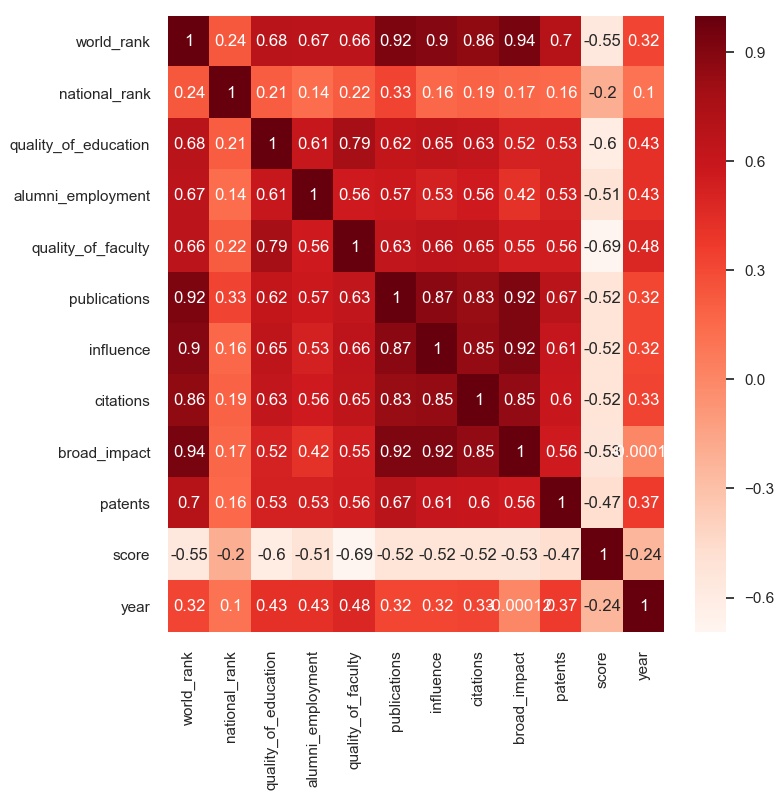

In [16]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(world_ranking.corr(),annot=True, cmap="Reds")
plt.show()

The above heatmap shows that there is a high positive correlation between (Here, I have considered correlations >= 0.75): 

* quality of faculty and quality of education
* publications and world rank
* rank of influence and world rank
* rank of influence and publication
* citations and publication
* citations and world rank
* citations and influence
* broad impact and world rank
* broad impact and publication
* broad impact anf influence
* broad impact and citations

Insight : 

Factors that directly affects world rank of a particular university are publications, rank of influence, citations and broad impact

In [17]:
world_ranking.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [18]:
world_ranking

world_rank                                        institution  \
0              1                                 Harvard University   
1              2              Massachusetts Institute of Technology   
2              3                                Stanford University   
3              4                            University of Cambridge   
4              5                 California Institute of Technology   
5              6                               Princeton University   
6              7                               University of Oxford   
7              8                                    Yale University   
8              9                                Columbia University   
9             10                 University of California, Berkeley   
10            11                              University of Chicago   
11            12                                 Cornell University   
12            13                         University of Pennsylvania   
13            14                                University of Tokyo   
14            15                           Johns Hopkins University   
15            16    Swiss Federal Institute of Technology in Zurich   
16            17                                   Kyoto University   
17            18                      Weizmann Institute of Science   
18            19              University of California, Los Angeles   
19            20                University of California, San Diego   
20            21                             Rockefeller University   
21            22                     Hebrew University of Jerusalem   
22            23                                New York University   
23            24            University of California, San Francisco   
24            25                    University of Wisconsin–Madison   
25            26         University of Illinois at Urbana–Champaign   
26            27                                    Duke University   
27            28                            Imperial College London   
28            29    University of Texas Southwestern Medical Center   
29            30                      University of Texas at Austin   
...          ...                                                ...   
2170         971                         Fu Jen Catholic University   
2171         972                            Hunan Normal University   
2172         973  Ulsan National Institute of Science and Techno...   
2173         974                  Federal University of Santa Maria   
2174         975                                Shenzhen University   
2175         976                         Tianjin Medical University   
2176         977                   Beijing University of Technology   
2177         978              University of Reims Champagne-Ardenne   
2178         979                                 Yuan Ze University   
2179         980     University of Chemistry and Technology, Prague   
2180         981                             University of Limerick   
2181         982                     China Medical University (PRC)   
2182         983                               Feng Chia University   
2183         984                  Zhejiang University of Technology   
2184         985                       Novosibirsk State University   
2185         986                            University of Bucharest   
2186         987                            Babeș-Bolyai University   
2187         988                                Mansoura University   
2188         989              University of Pau and Pays de l'Adour   
2189         990                            Henan Normal University   
2190         991                                  Xidian University   
2191         992                        Federal University of Bahia   
2192         993                      Southwest Jiaotong University   
2193         994                                 Ryerson University   
2194         995              

### Top 15 universities based on world rank

In [19]:
top_15 = world_ranking['institution'].head(15)
top_15

0                        Harvard University
1     Massachusetts Institute of Technology
2                       Stanford University
3                   University of Cambridge
4        California Institute of Technology
5                      Princeton University
6                      University of Oxford
7                           Yale University
8                       Columbia University
9        University of California, Berkeley
10                    University of Chicago
11                       Cornell University
12               University of Pennsylvania
13                      University of Tokyo
14                 Johns Hopkins University
Name: institution, dtype: object

In [20]:
top15_score = world_ranking[['institution','score']].head(15)
top15_score

institution   score
0                      Harvard University  100.00
1   Massachusetts Institute of Technology   91.67
2                     Stanford University   89.50
3                 University of Cambridge   86.17
4      California Institute of Technology   85.21
5                    Princeton University   82.50
6                    University of Oxford   82.34
7                         Yale University   79.14
8                     Columbia University   78.86
9      University of California, Berkeley   78.55
10                  University of Chicago   73.82
11                     Cornell University   73.69
12             University of Pennsylvania   73.64
13                    University of Tokyo   69.49
14               Johns Hopkins University   66.94

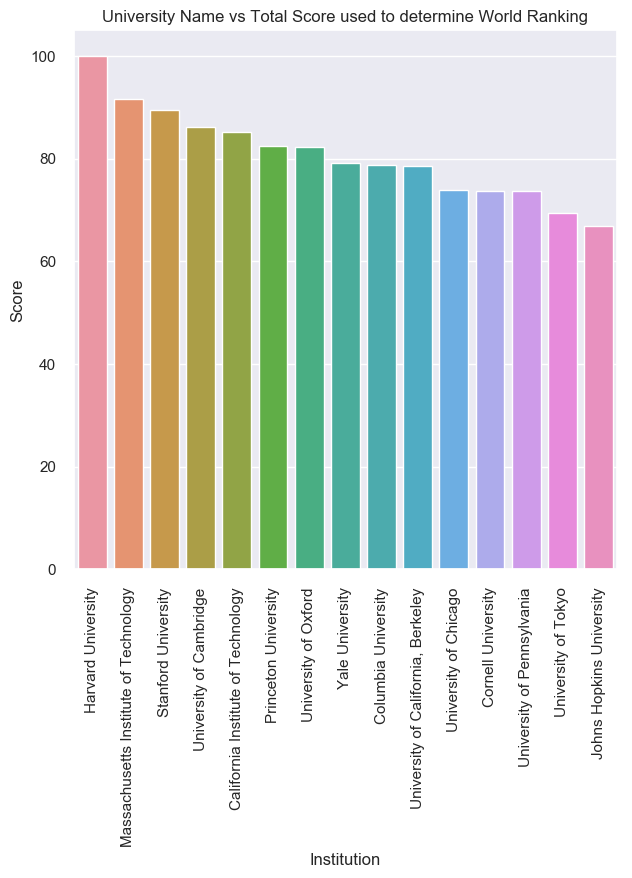

In [21]:

sns.set(rc={'figure.figsize':(7,7)})
g = sns.barplot(x='institution',y='score',data=top15_score)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.xlabel('Institution')
plt.ylabel('Score')
plt.title('University Name vs Total Score used to determine World Ranking')
plt.show()


Insight : 

* Harvard University secured the first rank. They obtained the highest score, that is 100.
* Johns Hopkins University secured 15th rank with a score of 66.94

### Top 15 universities based on country

In [22]:
top15_country = world_ranking[['institution','score','country']].head(15)
top15_country

institution   score         country
0                      Harvard University  100.00             USA
1   Massachusetts Institute of Technology   91.67             USA
2                     Stanford University   89.50             USA
3                 University of Cambridge   86.17  United Kingdom
4      California Institute of Technology   85.21             USA
5                    Princeton University   82.50             USA
6                    University of Oxford   82.34  United Kingdom
7                         Yale University   79.14             USA
8                     Columbia University   78.86             USA
9      University of California, Berkeley   78.55             USA
10                  University of Chicago   73.82             USA
11                     Cornell University   73.69             USA
12             University of Pennsylvania   73.64             USA
13                    University of Tokyo   69.49           Japan
14               Johns Hopkins University   66.94             USA

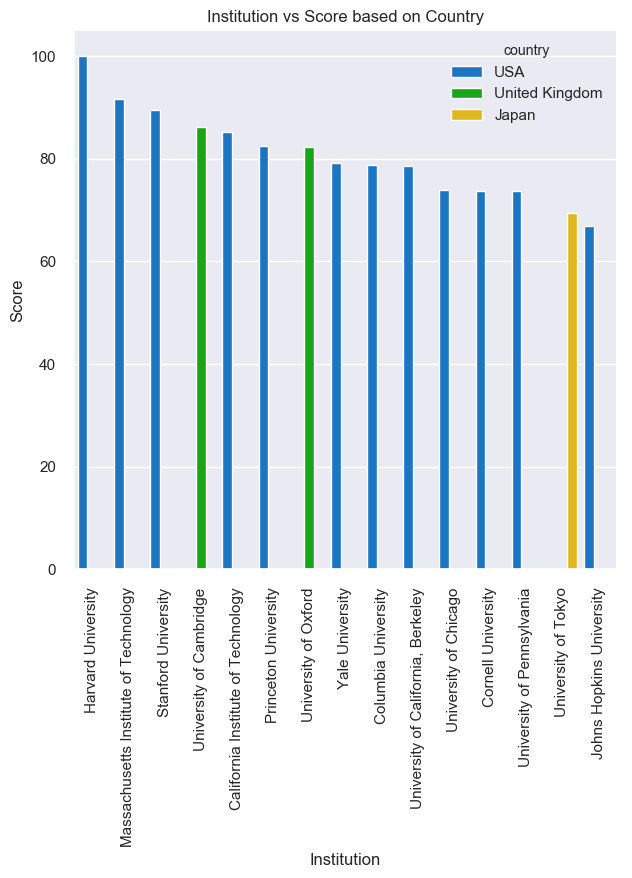

In [23]:
g = sns.barplot(x='institution',y='score',hue='country',data=top15_country,palette ='nipy_spectral',dodge=True)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.ylabel('Score')
plt.xlabel('Institution')
plt.title('Institution vs Score based on Country')
plt.show()

Insights :

* Here, I have plotted for the top 15 universities grouped by their rescpective countries.
* From the above plot, we can see that most of the universities that bagges top ranking is from the United States.
* United Kingdom comes the second 

### Bottom 15 universities based on world ranking

In [24]:
bottom15_score = world_ranking[['institution','score','country']].tail(15)
bottom15_score

institution  score       country
2185                University of Bucharest  44.04       Romania
2186                Babeș-Bolyai University  44.04       Romania
2187                    Mansoura University  44.04         Egypt
2188  University of Pau and Pays de l'Adour  44.04        France
2189                Henan Normal University  44.04         China
2190                      Xidian University  44.03         China
2191            Federal University of Bahia  44.03        Brazil
2192          Southwest Jiaotong University  44.03         China
2193                     Ryerson University  44.03        Canada
2194              King Abdulaziz University  44.03  Saudi Arabia
2195              University of the Algarve  44.03      Portugal
2196                  Alexandria University  44.03         Egypt
2197            Federal University of Ceará  44.03        Brazil
2198                 University of A Coruña  44.02         Spain
2199        China Pharmaceutical University  44.02         China

### Bottom 15 universities based on world ranking

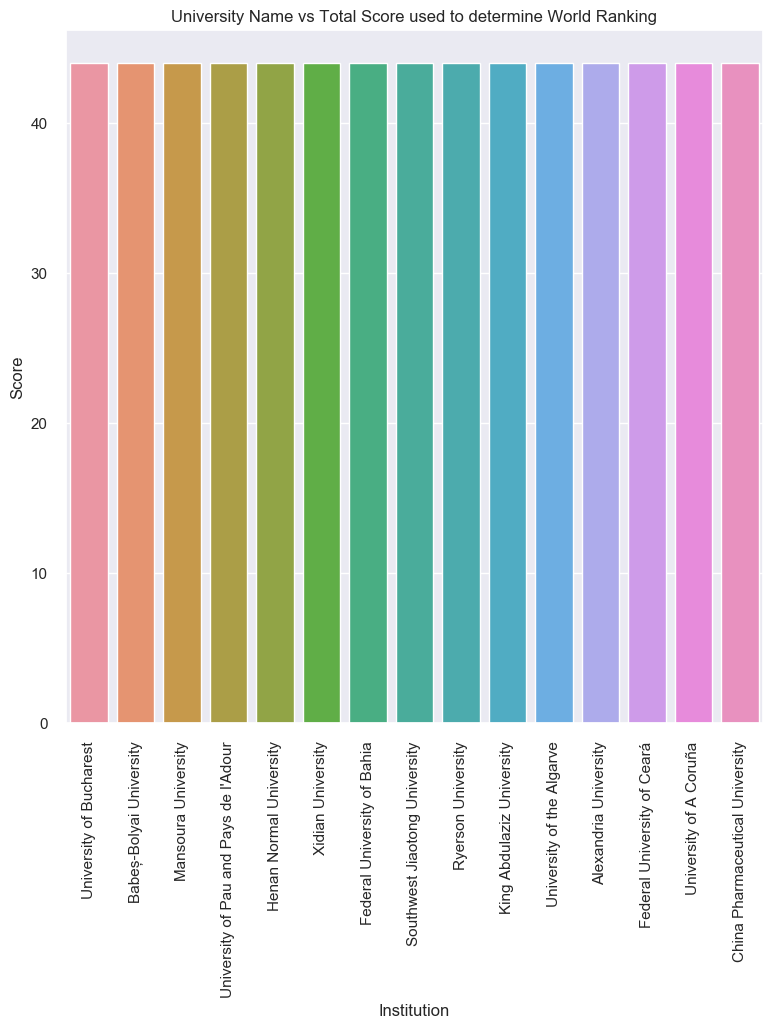

In [25]:
sns.set(rc={'figure.figsize':(9,9)})
g = sns.barplot(x='institution',y='score',data=bottom15_score)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.xlabel('Institution')
plt.ylabel('Score')
plt.title('University Name vs Total Score used to determine World Ranking')
plt.show()

Insights:

* The ranking score for the bottom  15 countries is almost the same

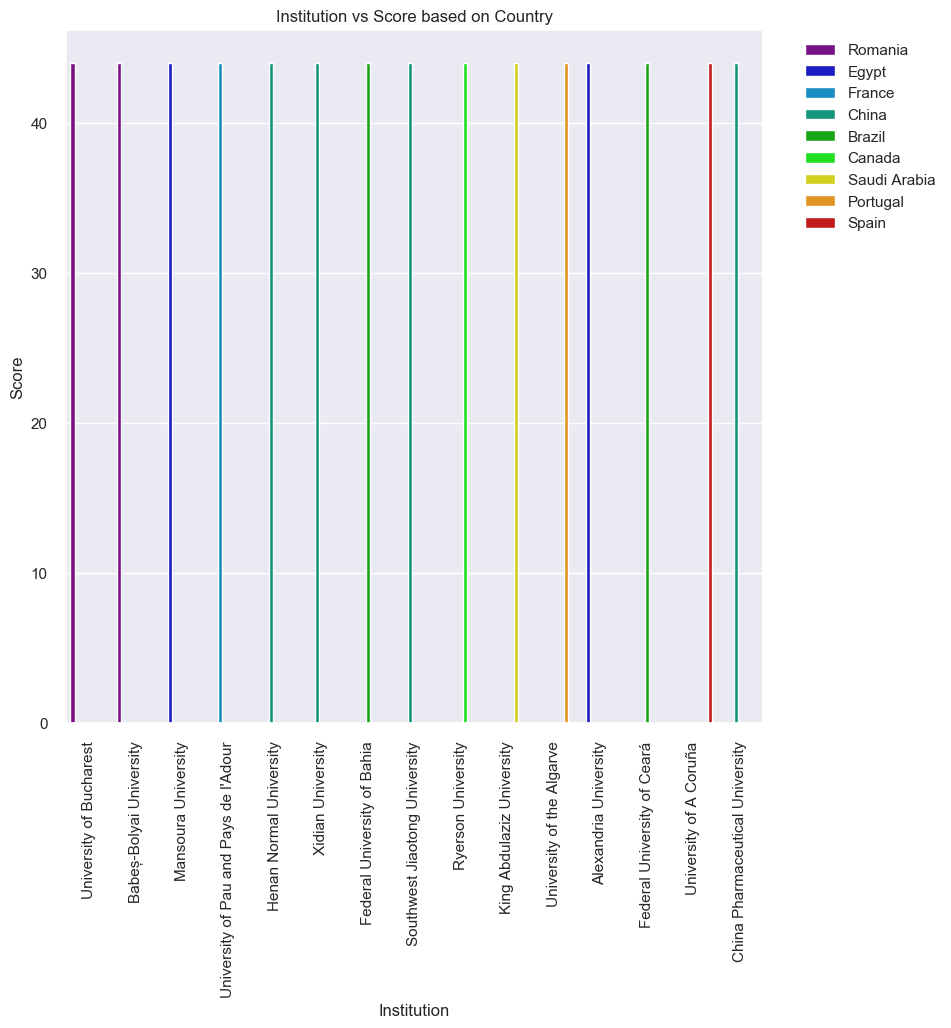

In [26]:
g = sns.barplot(x='institution',y='score',hue='country',data= bottom15_score,palette ='nipy_spectral',dodge=True)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.ylabel('Score')
plt.xlabel('Institution')
plt.title('Institution vs Score based on Country')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

Insights :

* Here, I have plotted for the bottom 15 universities grouped by their rescpective countries.

### Line Charts

Lets plot some line charts considering various factors that affects the world ranking of top universities

### Citation and Quality of education vs World Rank of Top 100 Universities 

In [27]:
import plotly.graph_objs as go

df = world_ranking.iloc[:100,:]

trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.institution)


In [28]:
# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.quality_of_education,
                    mode = "lines+markers",
                    name = "quality of education",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.institution)


In [29]:
data = [trace1, trace2]
layout = dict(title = 'Citation and Quality of education vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

Insights: 

* Here, I have plotted citation vs world rank and quality of education vs world rank on the same graph, to see how these two variables (citation and quality of education) are related to each other. Also to establish how world rank varies due to these factors. The points in the graph will show the name of the institution. 
* One thing that is clearly visible from the above line chart is that, citation and quality of education are in-phase most of the times.
* For institutions having world ranks in the range 20 to around 50, the relationship is pretty much out-of-phase. 

In [30]:
world_ranking.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

### Citation and Quality of faculty vs World Rank of Top 100 Universities 

In [31]:
import plotly.graph_objs as go

df = world_ranking.iloc[:100,:]

trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.institution)


In [32]:
# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.quality_of_faculty,
                    mode = "lines+markers",
                    name = "quality of faculty",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.institution)


In [33]:
data = [trace1, trace2]
layout = dict(title = 'Citation and Quality of faculty vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

Insights: 

* From the above plot, we cannot actually infer any clear relationship between citation and quality of faculty. Because, the pattern is pretty ir-regular. For some institutes, they are in-phase and for some they are out-of phase.

### Pie Chart

Top Countrywise percentage of institution 

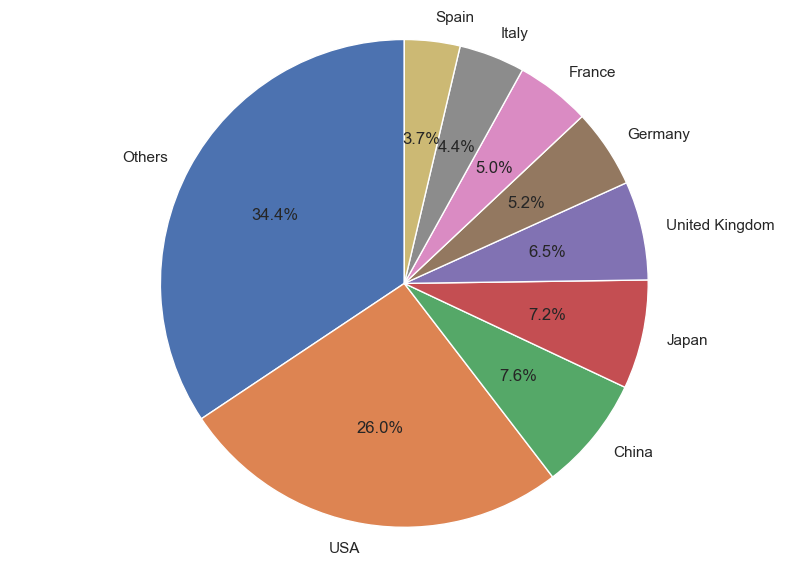

In [34]:

world_ranking_countrywise = world_ranking.groupby('country').size()
world_ranking_countrywise = pd.DataFrame(world_ranking_countrywise)
world_ranking_countrywise = world_ranking_countrywise.reset_index()
world_ranking_countrywise = world_ranking_countrywise.rename(columns = {0:'count'})
world_ranking_countrywise = world_ranking_countrywise.sort_values('count', ascending=False)
world_ranking_countrywise.loc[world_ranking_countrywise['count'] <75, 'country'] = "Others"
world_ranking_countrywise = world_ranking_countrywise.groupby('country').agg({'count':np.sum})
world_ranking_countrywise = pd.DataFrame(world_ranking_countrywise)
world_ranking_countrywise = world_ranking_countrywise.reset_index()
world_ranking_countrywise = world_ranking_countrywise.rename(columns = {0:'count'})
world_ranking_countrywise = world_ranking_countrywise.sort_values('count', ascending=False)
plt.figure(figsize=(10,7))
plt.pie(world_ranking_countrywise['count'], labels = world_ranking_countrywise['country'], autopct = '%1.1f%%', startangle=90)
plt.axis('Equal')
plt.show()

Insights:

* Top 3 country is dominated by USA, CHINA and JAPAN with 40% of institution in top100
* USA conntributes more than any other country with more than 26% of the institution in world ranking

Publication Rates

Here, I have used Pie charts to explore the rate of publication in each year.

#### Publication Rates for top 7 universities in the year 2012

In [35]:
df2012 = world_ranking[world_ranking.year == 2012].iloc[:7,:]

In [36]:
df2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 14 columns):
world_rank              7 non-null int64
institution             7 non-null object
country                 7 non-null object
national_rank           7 non-null int64
quality_of_education    7 non-null int64
alumni_employment       7 non-null int64
quality_of_faculty      7 non-null int64
publications            7 non-null int64
influence               7 non-null int64
citations               7 non-null int64
broad_impact            0 non-null float64
patents                 7 non-null int64
score                   7 non-null float64
year                    7 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 840.0+ bytes


In [37]:

pie1 = df2012.publications

fig = {
    "data" : [
        {
            "values" : pie1,
            "labels" : df2012.institution,
            "domain" : {"x": [0, .5]},
            "name": "Publication Rates",
            "hoverinfo":"label+percent+name",
            "hole": .3,
            "type": "pie"
    },], 
    "layout": {
        "title":"Publication Rates for top 7 universities in the year 2012",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Publications",
                "x": 0.40,
                "y": 1
        },
    ]
}
}
iplot(fig)

Insights: 

* Publication rate is the highest for Princeton University, which is 38.4%
* It is second highest for CalTech
* it is the lowest for Harvard University as compared to others

#### Publication Rates for top 7 universities in the year 2013

In [38]:
df2013 = world_ranking[world_ranking.year == 2013].iloc[:7,:]

In [39]:
pie2 = df2013.publications
#pie1_list = [float(each.replace(',','.')) for each in df2016.num_students]

fig = {
    "data" : [
        {
            "values" : pie2,
            "labels" : df2013.institution,
            "domain" : {"x": [0, .5]},
            "name": "Publication Rates",
            "hoverinfo":"label+percent+name",
            "hole": .3,
            "type": "pie"
    },], 
    "layout": {
        "title":"Publication Rates for top 7 universities in the year 2013",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Publications",
                "x": 0.40,
                "y": 1
        },
    ]
}
}
iplot(fig)

Insights: 

* Publication rate is the highest for MIT
* It is second highest for Columbia
* It is the lowest for Harvard University as compared to others

#### Publication Rates for top 7 universities in the year 2014

In [40]:
df2014 = world_ranking[world_ranking.year == 2014].iloc[:7,:]

In [41]:
pie3 = df2014.publications
#pie1_list = [float(each.replace(',','.')) for each in df2016.num_students]

fig = {
    "data" : [
        {
            "values" : pie3,
            "labels" : df2014.institution,
            "domain" : {"x": [0, .5]},
            "name": "Publication Rates",
            "hoverinfo":"label+percent+name",
            "hole": .3,
            "type": "pie"
    },], 
    "layout": {
        "title":"Publication Rates for top 7 universities in the year 2014",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Publications",
                "x": 0.40,
                "y": 1
        },
    ]
}
}
iplot(fig)

Insights: 

* Publication rate is the highest for MIT
* It is second highest for Columbia
* Once again, it is the lowest for Harvard University as compared to others

#### Publication Rates for top 7 universities in the year 2015

In [42]:
df2015 = world_ranking[world_ranking.year == 2015].iloc[:7,:]

In [43]:
pie4 = df2015.publications
#pie1_list = [float(each.replace(',','.')) for each in df2016.num_students]

fig = {
    "data" : [
        {
            "values" : pie4,
            "labels" : df2015.institution,
            "domain" : {"x": [0, .5]},
            "name": "Publication Rates",
            "hoverinfo":"label+percent+name",
            "hole": .3,
            "type": "pie"
    },], 
    "layout": {
        "title":"Publication Rates for top 7 universities in the year 2015",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Publications",
                "x": 0.40,
                "y": 1
        },
    ]
}
}
iplot(fig)

Insights: 

* Publication rate is the highest for MIT
* It is second highest for Columbia
* It is the lowest for Harvard University as compared to others

## Scatter Plot 

### Citation vs world rank of top 100 universities during 2012, 2013,2014 and 2015 years

In [44]:
# prepare data frames
df2012 = world_ranking[world_ranking.year == 2012].iloc[:100,:]
df2013 = world_ranking[world_ranking.year == 2013].iloc[:100,:]
df2014 = world_ranking[world_ranking.year == 2014].iloc[:100,:]
df2015 = world_ranking[world_ranking.year == 2015].iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2012.world_rank,
                    y = df2012.citations,
                    mode = "markers",
                    name = "2012",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2012.institution)
# creating trace2
trace2 =go.Scatter(
                    x = df2013.world_rank,
                    y = df2013.citations,
                    mode = "markers",
                    name = "2013",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2013.institution)

# creating trace3
trace3 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2014.institution)

# creating trace3
trace4 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2015.institution)

data = [trace1, trace2, trace3,trace4]

layout = dict(title = 'Citation vs world rank of top 100 universities during 2012, 2013, 2014 and 2015 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

Insights: 

* Here I have plotted citation vs world rank for top 100 universities for the years 2012, 2013, 2014, 2015
* The variation in citation is much higher in the years 2014 and 2015
* It is constant during 2012 and 2013

###  Rank of influence vs world rank of top 100 universities during 2012, 2013, 2014 and 2015 years

In [45]:
# prepare data frames
df2012 = world_ranking[world_ranking.year == 2012].iloc[:100,:]
df2013 = world_ranking[world_ranking.year == 2013].iloc[:100,:]
df2014 = world_ranking[world_ranking.year == 2014].iloc[:100,:]
df2015 = world_ranking[world_ranking.year == 2015].iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2012.world_rank,
                    y = df2012.influence,
                    mode = "markers",
                    name = "2012",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2012.institution)
# creating trace2
trace2 =go.Scatter(
                    x = df2013.world_rank,
                    y = df2013.influence,
                    mode = "markers",
                    name = "2013",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2013.institution)

# creating trace3
trace3 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.influence,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2014.institution)

# creating trace3
trace4 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.influence,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2015.institution)

data = [trace1, trace2, trace3,trace4]

layout = dict(title = 'Rank of influence vs world rank of top 100 universities during 2012, 2013, 2014 and 2015 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Rank of Influence',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

Insights: 

* Here I have plotted Rank of Influence vs world rank for top 100 universities for the years 2012, 2013, 2014, 2015
* The variation in citation is much higher in the years 2014 and 2015
* It is constant during 2012 and 2013

###  Broad Impact vs world rank of top 100 universities during 2012, 2013, 2014 and 2015 years

In [46]:
# prepare data frames
df2012 = world_ranking[world_ranking.year == 2012].iloc[:100,:]
df2013 = world_ranking[world_ranking.year == 2013].iloc[:100,:]
df2014 = world_ranking[world_ranking.year == 2014].iloc[:100,:]
df2015 = world_ranking[world_ranking.year == 2015].iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2012.world_rank,
                    y = df2012.broad_impact,
                    mode = "markers",
                    name = "2012",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2012.institution)
# creating trace2
trace2 =go.Scatter(
                    x = df2013.world_rank,
                    y = df2013.broad_impact,
                    mode = "markers",
                    name = "2013",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2013.institution)

# creating trace3
trace3 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.broad_impact,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2014.institution)

# creating trace3
trace4 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.broad_impact,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2015.institution)

data = [trace1, trace2, trace3,trace4]

layout = dict(title = 'Broad Impact vs world rank of top 100 universities with 2012, 2013, 2014 and 2015 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Broad Impact',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

Insights: 

* Here I have plotted Broad Impact vs world rank for top 100 universities for the years 2012, 2013, 2014, 2015
* The values are only there for the years 2014 and 2015

### Publication vs world rank of top 100 universities during 2012, 2013, 2014 and 2015 years

In [47]:
# prepare data frames
df2012 = world_ranking[world_ranking.year == 2012].iloc[:100,:]
df2013 = world_ranking[world_ranking.year == 2013].iloc[:100,:]
df2014 = world_ranking[world_ranking.year == 2014].iloc[:100,:]
df2015 = world_ranking[world_ranking.year == 2015].iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2012.world_rank,
                    y = df2012.publications,
                    mode = "markers",
                    name = "2012",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2012.institution)
# creating trace2
trace2 =go.Scatter(
                    x = df2013.world_rank,
                    y = df2013.publications,
                    mode = "markers",
                    name = "2013",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2013.institution)

# creating trace3
trace3 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.publications,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2014.institution)

# creating trace3
trace4 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.publications,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2015.institution)

data = [trace1, trace2, trace3,trace4]

layout = dict(title = 'Publicaation vs world rank of top 100 universities during 2012, 2013, 2014 and 2015 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Publications',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

Insights: 

* Here I have plotted Publications vs world rank for top 100 universities for the years 2012, 2013, 2014, 2015
* The variation is higher during the years 2014 and 2015
* Publication number is almost constant during the years 2012 and 2013

### Word Cloud

### Countries that were most mentioned during the years 2012, 2013,2014 and 2015

I have tried to plot a world cloud for the countries that were most mentioned for each and every year

###  2012

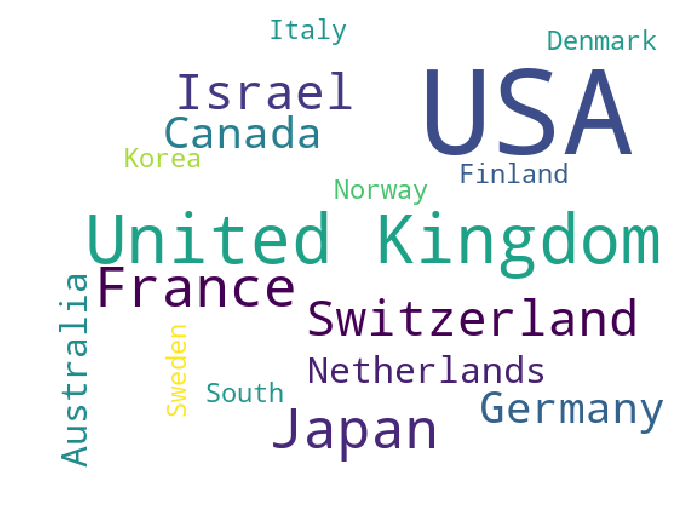

In [48]:
x2012 = world_ranking.country[world_ranking.year == 2012]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2012))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

Insights:

* In the year 2012, most of uni versity that were mentioned in our data are from the United States
* Second comes the United Kingdom
* Then comes, France, Switzerland and Canada

#### 2013

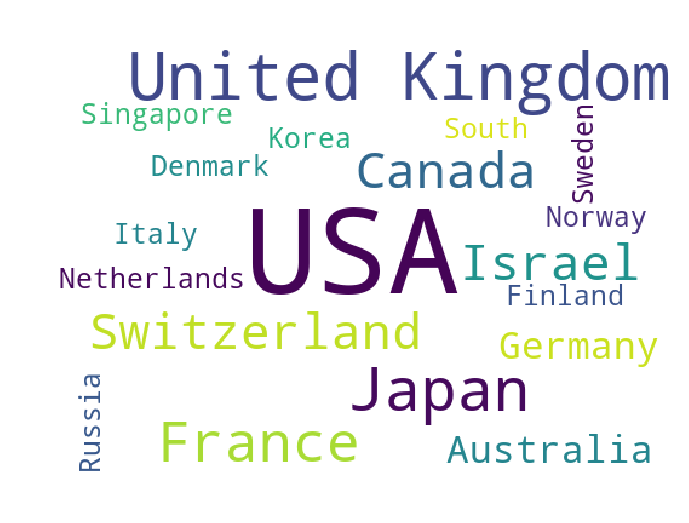

In [49]:

x2013 = world_ranking.country[world_ranking.year == 2013]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2013))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

Insights:

* In the year 2013, the most mentioned country is again the States
* Second is UK
* Then comes Japan, France, Switzeland and Canada

#### 2014

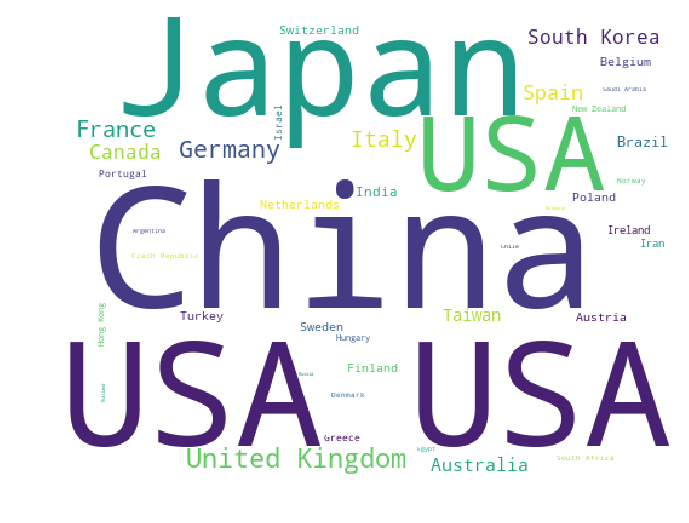

In [50]:
# data prepararion
x2014 = world_ranking.country[world_ranking.year == 2014]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2014))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

Insights:

* There is a different trend we can observe in the year 2014.
* China is mentioned almost as equally as the US
* Japan comes the next

#### 2015

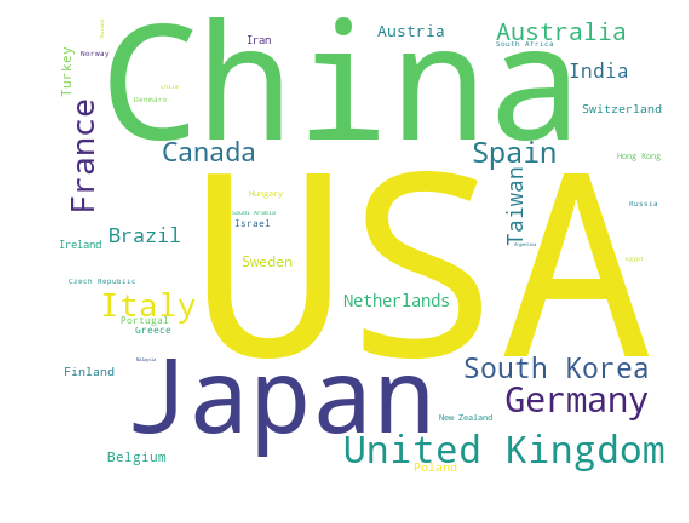

In [51]:
# data prepararion
x2015 = world_ranking.country[world_ranking.year == 2015]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2015))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

Insights:

* In the year 2015, again the most mentioned country is China and the USA
* Second comes Japan and then the United Kingdom

### Analysing India's performance in world ranking

In [52]:
#Mapping India's Performance
usa     = world_ranking[world_ranking.country == "USA"]
uk      = world_ranking[world_ranking.country == "United Kingdom"]
gm      = world_ranking[world_ranking.country == "Germany"]
In      = world_ranking[world_ranking.country == "India"]

conc_data = pd.concat([usa,uk,gm,In],axis=0,ignore_index=True)

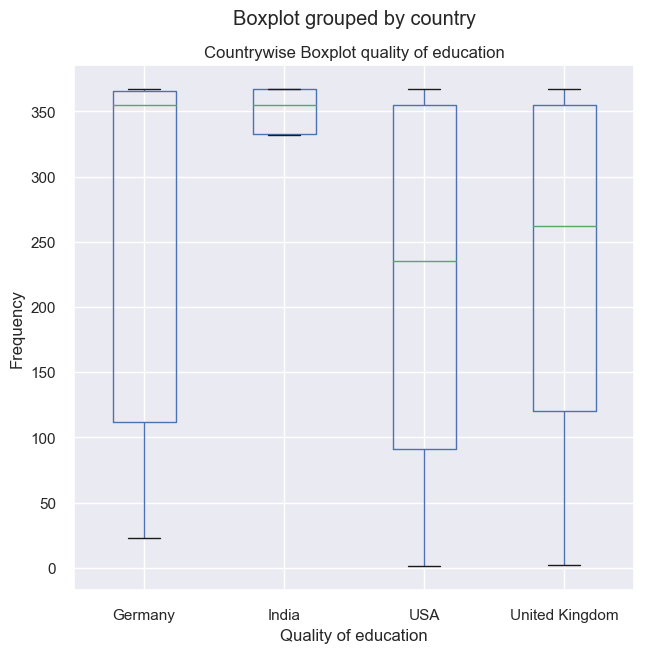

In [53]:
conc_data.boxplot(column="quality_of_education", by="country",figsize=(7,7))
plt.xlabel("Quality of education")
plt.ylabel("Frequency")
plt.title("Countrywise Boxplot quality of education")
plt.show()


Insights:

* India has lot of outliers with right skewed

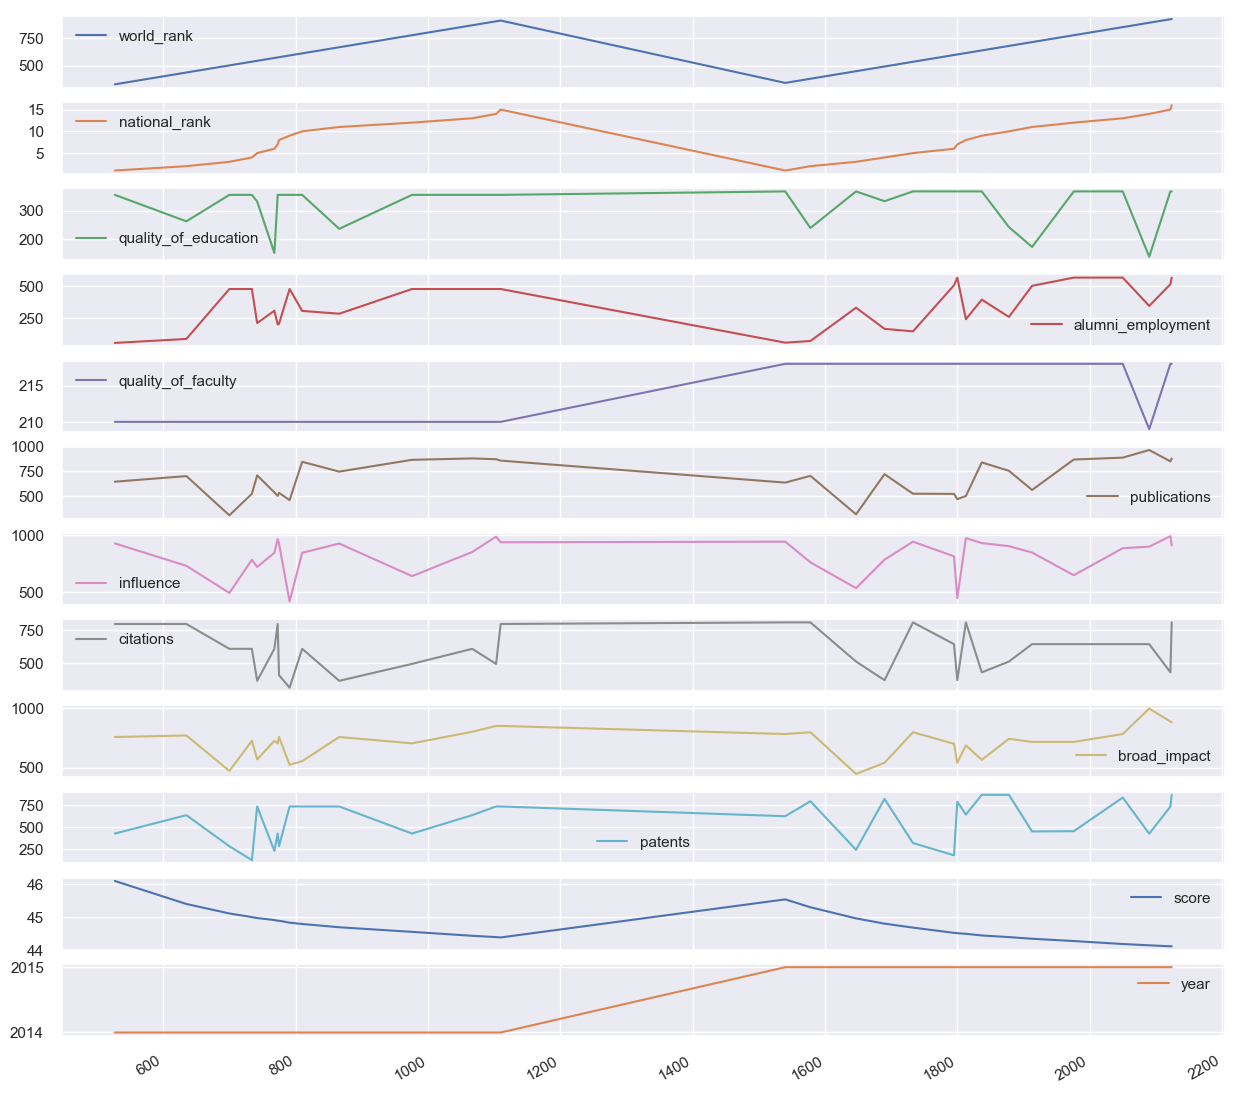

In [54]:
In.plot(subplots=True,figsize=(15,15))
plt.show()

Insights:

* In the above plot, I have mapped India's performance across various attributes.
* World ranking has increased from 2014 to 2015
* Most of the parameters are very irregular over the year.
* The higly correlated variables which affects the world ranking has not shown much progress.

In [55]:
world_ranking.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

### Alumni Employment Rate

In [56]:
# prepare data frames
df2012 = world_ranking[world_ranking.year == 2012].iloc[:100,:]
df2013 = world_ranking[world_ranking.year == 2013].iloc[:100,:]
df2014 = world_ranking[world_ranking.year == 2014].iloc[:100,:]
df2015 = world_ranking[world_ranking.year == 2015].iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2012.world_rank,
                    y = df2012.alumni_employment,
                    mode = "markers",
                    name = "2012",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2012.institution)
# creating trace2
trace2 =go.Scatter(
                    x = df2013.world_rank,
                    y = df2013.alumni_employment,
                    mode = "markers",
                    name = "2013",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2013.institution)

# creating trace3
trace3 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.alumni_employment,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2014.institution)

# creating trace3
trace4 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.alumni_employment,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2015.institution)

data = [trace1, trace2, trace3,trace4]

layout = dict(title = 'Alumni Employment vs world rank of top 100 universities during 2012, 2013, 2014 and 2015 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Alumni Employment',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

### Geomap

In [57]:
worldcode = pd.read_csv("C:/Users/Administrator/Desktop/world-code.csv")

mergedrank = world_ranking.merge(worldcode, left_on='country', right_on='COUNTRY', how='left')
mergedrank.columns


mergedrank1 = mergedrank.groupby('CODE').agg({'patents':np.sum})

mergedrank1 = pd.DataFrame(mergedrank1)
mergedrank1.head(10)

mergedrank1 = mergedrank1.reset_index()
mergedrank1.head(10)


data = [ dict(type = 'choropleth', colorscale = 'Portland',
        locations = mergedrank1['CODE'],
        z = mergedrank1['patents'],
        colorbar = dict(title = 'Number of Patents'))]
layout = dict(
    title = 'World Map of Total Patents between 2012 and 2015',
    geo = dict(
        showframe = False,
        showcoastlines = False))
choromap = dict(data=data,layout=layout)
iplot(choromap)


Insights:

* Above world map shows the number of patents across various universities in each country over the years, 2012 - 2015
* We can see that, USA and China lead in number of patents, followed by developed countries in Europe and Japan
